In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
house = pd.read_csv('../input/housing-prices-dataset/Housing.csv')
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df = house.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [5]:
df.isnull().values.any()

False

In [6]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


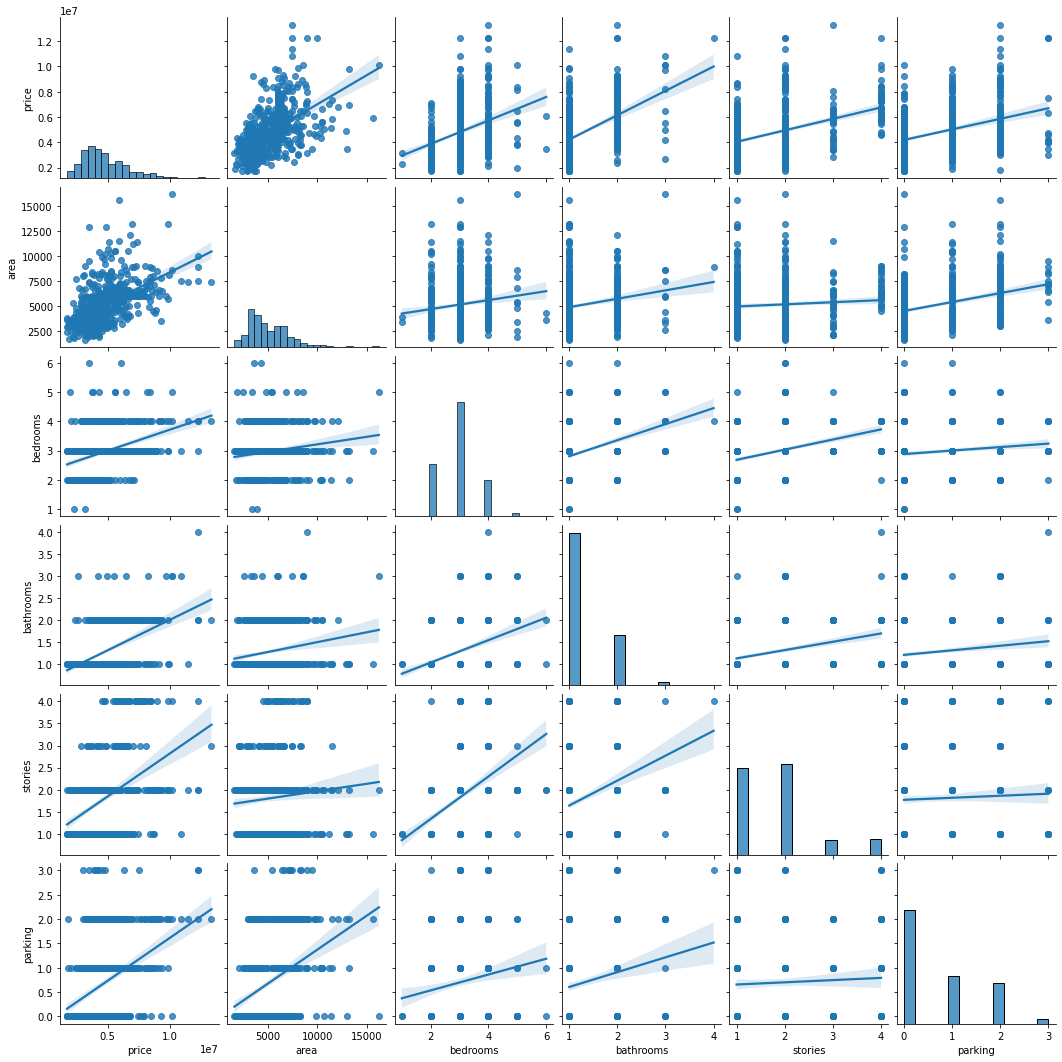

In [7]:
sbn.pairplot(df, kind= "reg")

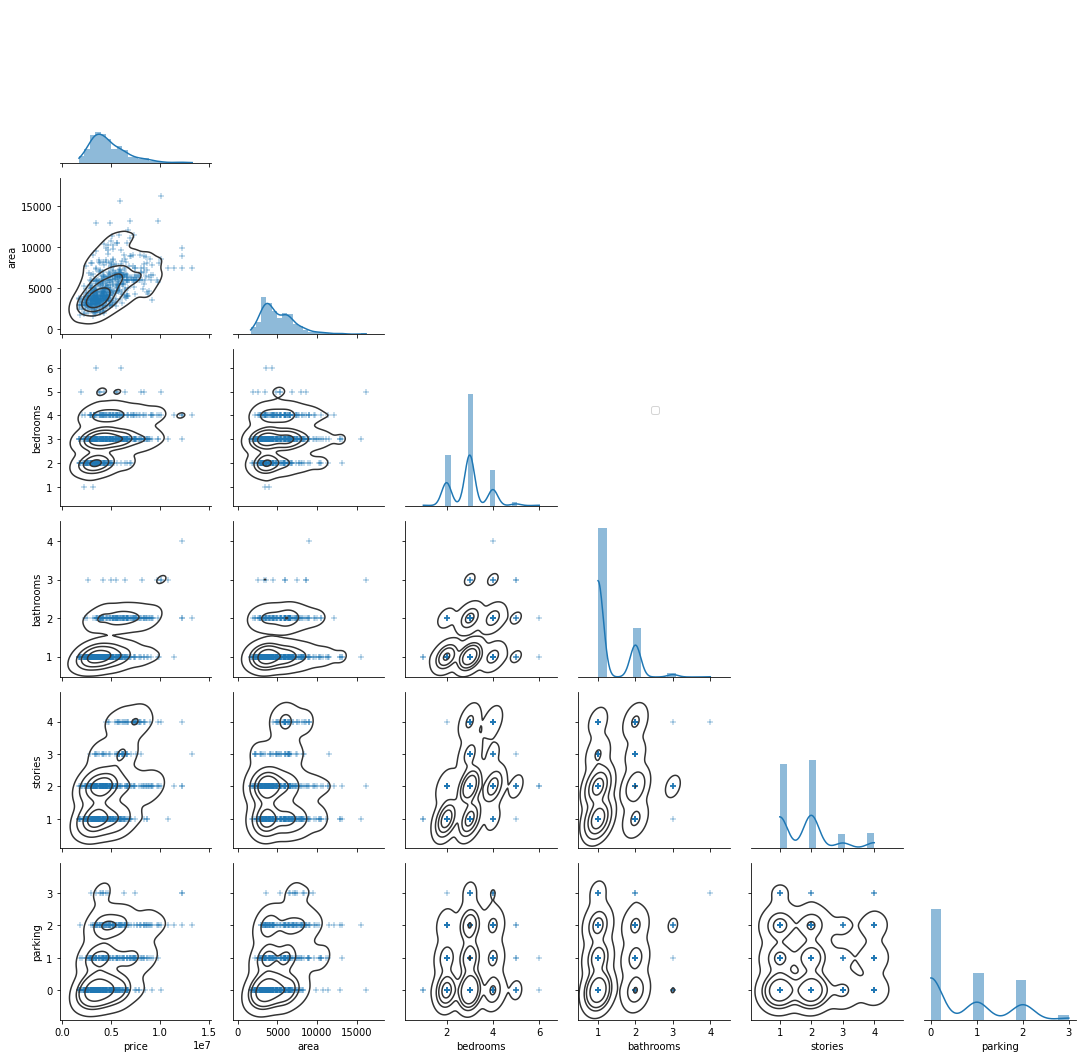

In [8]:
g = sbn.PairGrid(df,  corner=True)
g.map_lower(sbn.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sbn.scatterplot, marker="+")
g.map_diag(sbn.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

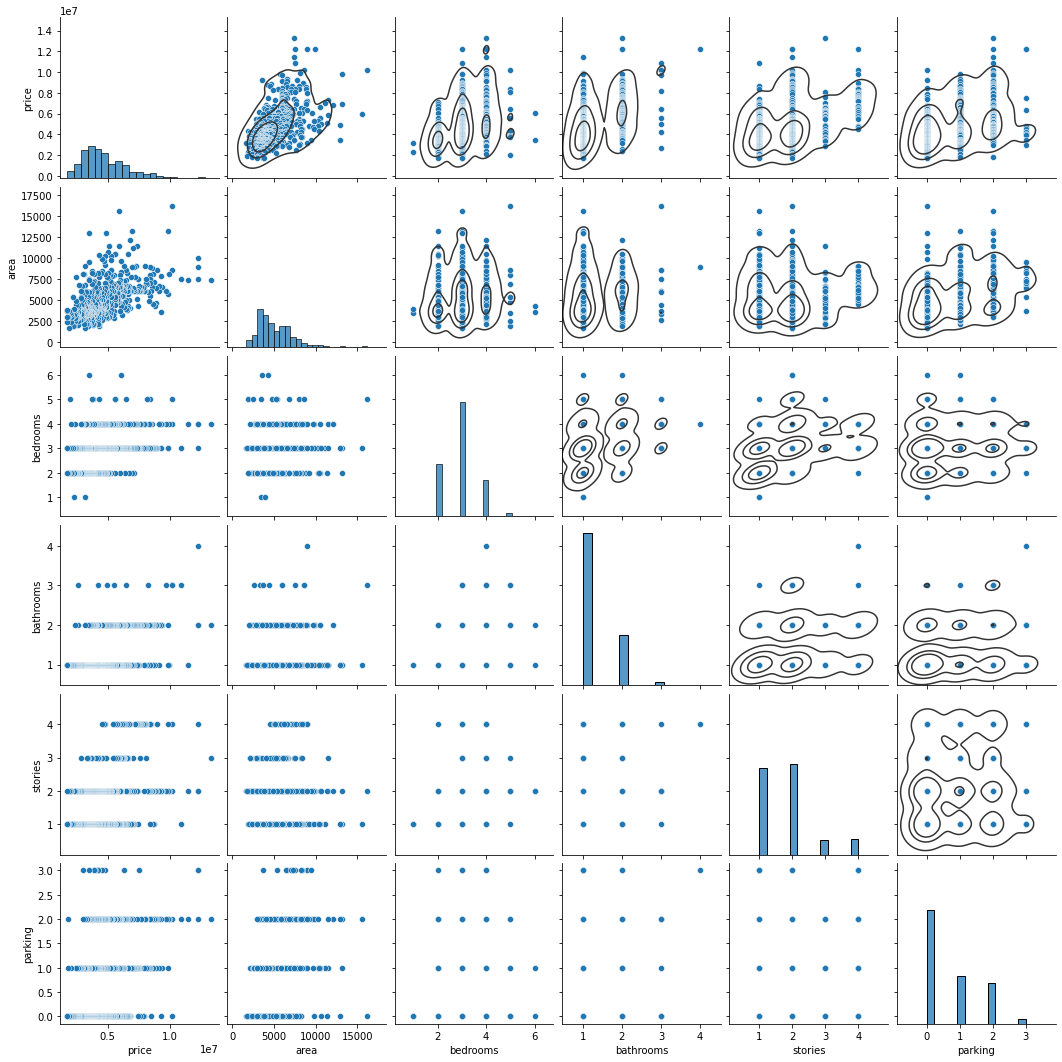

In [9]:
g = sbn.pairplot(df)
g.map_upper(sbn.kdeplot, levels=4, color=".2")
plt.show()

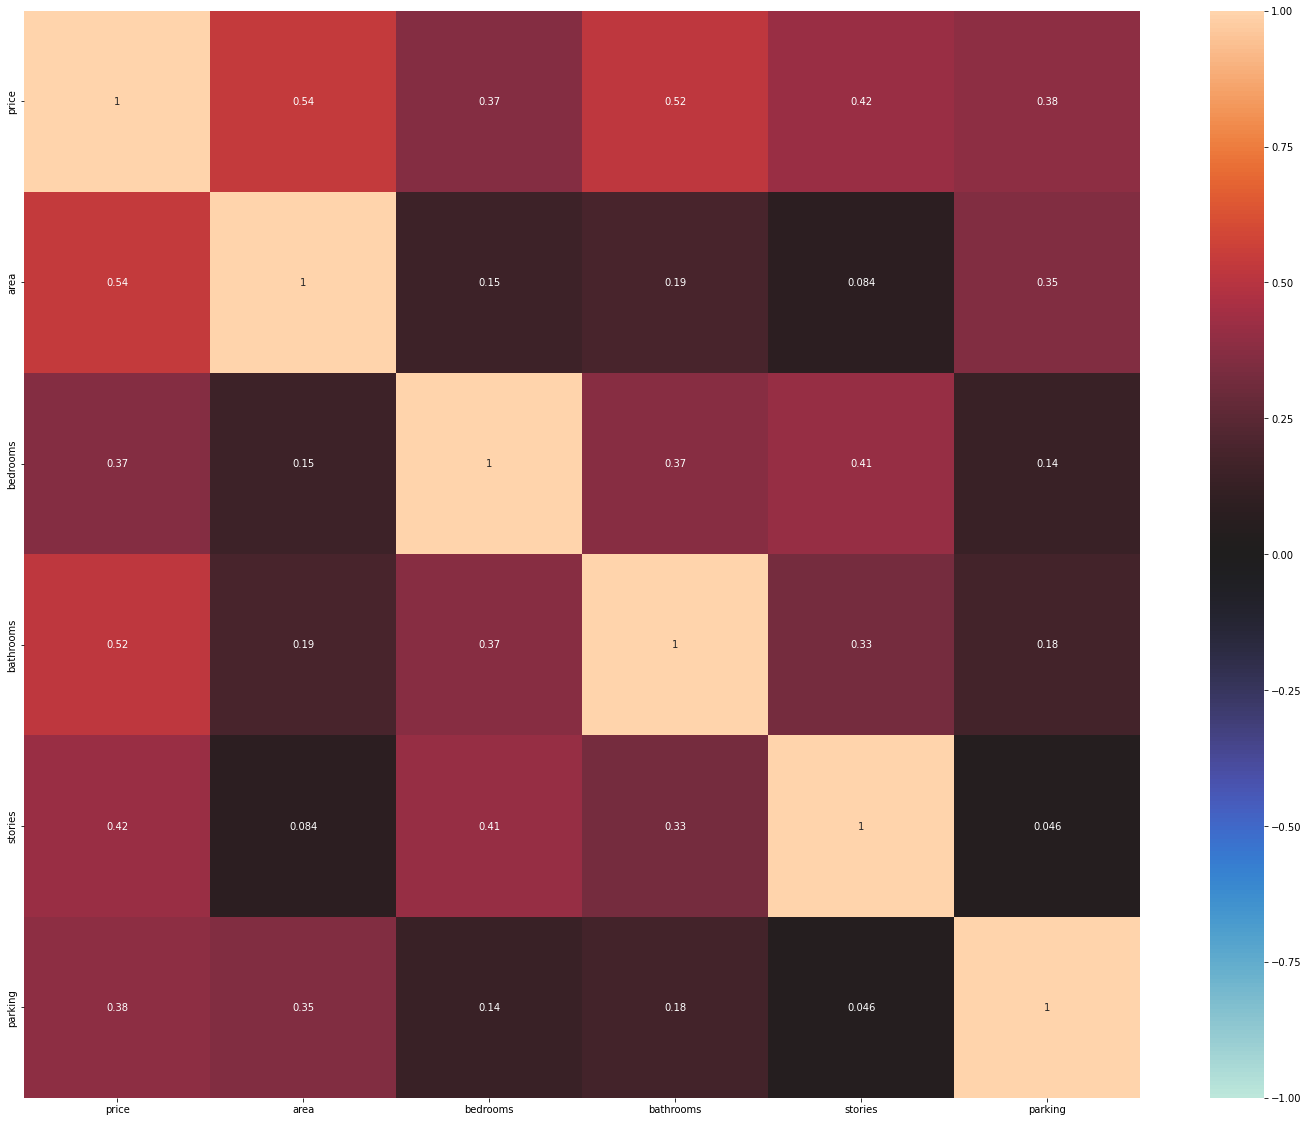

In [10]:
plt.figure(figsize=[25,20])
sbn.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [11]:
df = df.drop(["area","furnishingstatus"], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   bedrooms         545 non-null    int64 
 2   bathrooms        545 non-null    int64 
 3   stories          545 non-null    int64 
 4   mainroad         545 non-null    object
 5   guestroom        545 non-null    object
 6   basement         545 non-null    object
 7   hotwaterheating  545 non-null    object
 8   airconditioning  545 non-null    object
 9   parking          545 non-null    int64 
 10  prefarea         545 non-null    object
dtypes: int64(5), object(6)
memory usage: 47.0+ KB


In [13]:
dms = pd.get_dummies(df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]])
dms.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0,1,1,0,1,0,1,0,0,1,0,1
1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,1,0,0,1,1,0,1,0,0,1
3,0,1,1,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,1,1,0,0,1,1,0


In [14]:
y = df["price"]
X_ = df.drop(["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"], axis = 1).astype("float64")

In [15]:
X_.head()

,bedrooms,bathrooms,stories,parking
0,4.0,2.0,3.0,2.0
1,4.0,4.0,4.0,3.0
2,3.0,2.0,2.0,2.0
3,4.0,2.0,2.0,3.0
4,4.0,1.0,2.0,2.0


In [16]:
X = pd.concat([X_, dms[["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes"]]], axis=1)
X.head()

,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,4.0,2.0,3.0,2.0,1,0,0,0,1,1
1,4.0,4.0,4.0,3.0,1,0,0,0,1,0
2,3.0,2.0,2.0,2.0,1,0,1,0,0,1
3,4.0,2.0,2.0,3.0,1,0,1,0,1,1
4,4.0,1.0,2.0,2.0,1,1,1,0,1,0


In [17]:
RMSE = pd.DataFrame(np.zeros([5,2]), columns=['Train-RMSE','Test-RMSE'])
#Test ve train hatalarını bunun içine ekleyeceğiz

PCR MODEL

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

print("X_train", X_train.shape)

print("y_train", y_train.shape)

print("X_test", X_test.shape)

print("y_test", y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (436, 10)
y_train (436,)
X_test (109, 10)
y_test (109,)
training (545, 11)


In [19]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              844.2
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                   1.11e-273
Time:                        19:00:15   Log-Likelihood:                         -6684.2
No. Observations:                 436   AIC:                                  1.339e+04
Df Residuals:                     426   BIC:                                  1.343e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms             2.339e+05   6.64e+04      3.521      0.000    1.03e+05    3.64e+05
bathrooms            1.288e+06   1.23e+05     10.451      0.000    1.05e+06    1.53e+06
stories              3.734e+05   7.59e+04      4.921      0.000    2.24e+05    5.23e+05
parking              3.843e+05   6.61e+04      5.812      0.000    2.54e+05    5.14e+05
mainroad_yes         8.645e+05   1.41e+05      6.122      0.000    5.87e+05    1.14e+06
guestroom_yes         4.22e+05   1.55e+05      2.727      0.007    1.18e+05    7.26e+05
basement_yes         3.334e+05   1.29e+05      2.588      0.010    8.02e+04    5.87e+05
hotwaterheating_yes  7.325e+05   2.48e+05      2.952      0.003    2.45e+05    1.22e+06
airconditioning_yes  9.083e+05   1.28e+05      7.103      0.000    6.57e+05    1.16e+06
prefarea_yes         7.748e+05   1.33e+05      5.806      0.000    5.12e+05    1.04e+06
==============================================================================
Omnibus:                       49.473   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.745
Skew:                           0.623   Prob(JB):                     1.09e-23
Kurtosis:                       5.066   Cond. No.                         18.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
pca = PCA()

In [21]:
X_reduced_train = pca.fit_transform(scale(X_train))
#Verinin indirgenmesi

In [22]:
X_reduced_train [0:1, :]

array([[ 2.1745936 , -2.16762048, -0.72206511, -0.61024135, -0.05739552,
        -0.87017972, -0.05595008,  0.57932772, -0.67189984, -0.9405001 ]])

In [23]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5]

array([21.55, 37.27, 48.74, 59.6 , 68.49])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [27]:
pcr_model.intercept_

4706527.385321101

In [28]:
pcr_model.coef_

array([ 896303.57550191,   52529.85631213, -106304.26172837,
        208662.45956279,   26047.11524573,  -36520.63332715,
         68222.38317583,  233385.78116361, -279773.57581507,
        -56865.39615304])

PCR MODEL TAHMİN

In [29]:
y_pred1 = pcr_model.predict(X_reduced_train)

pcr_train_mse = np.sqrt(mean_squared_error(y_train, y_pred1))

pcr_train_mse

1096218.2497237748

In [30]:
df["price"].mean()

4766729.247706422

In [31]:
r2_score(y_train, y_pred1)

0.6102687222960939

In [32]:
pca2 = PCA()

In [33]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [34]:
y_pred2 = pcr_model.predict(X_reduced_test)

pcr_test_mse = np.sqrt(mean_squared_error(y_test, y_pred2))

pcr_test_mse

1725267.617072922

In [35]:
r2_score(y_test, y_pred2)

0.41111742335282253

In [36]:
RMSE.loc[0,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, y_pred1)))

RMSE.loc[0,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, y_pred2)))

PLS MODEL

In [37]:
house = pd.read_csv("../input/housing-prices-dataset/Housing.csv")
df = house.copy()
df = df.drop(["area","furnishingstatus"], axis=1)
dms = pd.get_dummies(df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]])
y = df["price"]
X_ = df.drop(["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [38]:
from sklearn.cross_decomposition import PLSRegression

In [39]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [40]:
pls_model.coef_

array([[140089.10676643],
       [542102.06627073],
       [294835.67036152],
       [369932.26967757],
       [284139.59623812],
       [169084.52036104],
       [150729.25023656],
       [175746.74655504],
       [417465.67930712],
       [326031.62403897]])

PLS MODEL TAHMİN

In [41]:
X_train.head()

,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
46,3.0,2.0,4.0,1.0,1,0,0,0,1,0
93,3.0,2.0,1.0,3.0,1,0,1,0,1,0
335,2.0,1.0,1.0,2.0,1,0,1,0,1,0
412,3.0,1.0,2.0,0.0,1,0,1,0,0,1
471,3.0,1.0,2.0,0.0,1,0,0,0,0,0


In [42]:
pls_model.predict(X_train)[0:10]

array([[6775620.93633726],
       [6924319.54930986],
       [5168735.82642217],
       [4699768.12009575],
       [3616423.35863138],
       [3930506.11754619],
       [3616423.35863138],
       [2460208.22287981],
       [2460208.22287981],
       [3272829.11987427]])

In [43]:
y_pred1 = pls_model.predict(X_train)

pls_train_mse = np.sqrt(mean_squared_error(y_train, y_pred1))

pls_train_mse

1098607.7504545255

In [44]:
r2_score(y_train, y_pred1)

0.6085678235168114

In [45]:
y_pred2 = pls_model.predict(X_test)

pls_test_mse = np.sqrt(mean_squared_error(y_test, y_pred2))

pls_test_mse

1423762.7405124586

In [46]:
r2_score(y_test, y_pred2)

0.5989569355116886

In [47]:
RMSE.loc[1,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, y_pred1)))

RMSE.loc[1,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, y_pred2)))

LASSO MODEL

In [48]:
house = pd.read_csv("../input/housing-prices-dataset/Housing.csv")
df = house.copy()
df = df.drop(["area","furnishingstatus"], axis=1)
dms = pd.get_dummies(df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]])
y = df["price"]
X_ = df.drop(["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso_model = Lasso(alpha= 0.1).fit(X_train, y_train)

In [51]:
lasso_model

Lasso(alpha=0.1)

In [52]:
lasso_model.coef_

array([ 136163.5394856 , 1234110.0035487 ,  366897.36564515,
        392081.02258686,  713033.58388174,  434665.53324134,
        314313.59820963,  727580.05194094,  937268.24435578,
        787387.35433926])

Text(0, 0.5, 'weights')

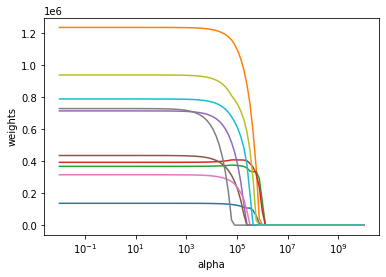

In [53]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso()
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")

LASSO MODEL TAHMİN

In [54]:
lasso_model.predict(X_test)

array([4960699.21421526, 6922727.60215511, 3094003.72913547,
       4534332.878622  , 3230167.26862107, 3230167.26862107,
       4951597.55815057, 6503704.66309074, 3207716.70108193,
       2517133.68473932, 9444060.55600828, 3094003.72913547,
       3318238.38960951, 3198344.64859411, 3911378.23247585,
       5786916.59072321, 3460901.09478062, 4926413.90120886,
       4303459.25506271, 3094003.72913547, 6055514.96425157,
       5703801.99876708, 3094003.72913547, 5525512.14264331,
       4720723.93459127, 6717037.63553753, 3842982.86058644,
       5580153.76926588, 6420195.87634461, 3460901.09478062,
       6870143.83471959, 3989145.65685308, 6570005.78105719,
       3597064.63426622, 3733228.17375181, 6160523.90475756,
       5130205.8108909 , 4984810.01631723, 3454401.92909511,
       4967338.17730051, 4014329.31379479, 4031271.97349125,
       6922727.60215511, 3989145.65685308, 3094003.72913547,
       4423352.99607811, 6502237.613461  , 4125309.19633867,
       3094003.72913547,

In [55]:
y_pred1 = pls_model.predict(X_train)

lasso_train_mse = np.sqrt(mean_squared_error(y_train, y_pred1))

lasso_train_mse

1098607.7504545255

In [56]:
r2_score(y_train, y_pred1)

0.6085678235168114

In [57]:
y_pred2 = lasso_model.predict(X_test)

lasso_test_mse = np.sqrt(mean_squared_error(y_test, y_pred2))

lasso_test_mse

1436525.019975717

In [58]:
r2_score(y_test, y_pred2)

0.5917349977473501

In [59]:
RMSE.loc[2,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, y_pred1)))

RMSE.loc[2,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, y_pred2)))

RİDGE MODEL

In [60]:
house = pd.read_csv("../input/housing-prices-dataset/Housing.csv")
df = house.copy()
df = df.drop(["area","furnishingstatus"], axis=1)
dms = pd.get_dummies(df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]])
y = df["price"]
X_ = df.drop(["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [61]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha= 0.1).fit(X_train, y_train)

In [62]:
ridge_model

Ridge(alpha=0.1)

In [63]:
ridge_model.coef_

array([ 136464.66830496, 1232779.54773837,  367204.34176589,
        392355.96155475,  711948.81603205,  434343.05739537,
        314578.7715679 ,  723667.12304105,  936120.8929798 ,
        786499.42241403])

In [64]:
ridge_model.intercept_

509344.6788720358

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

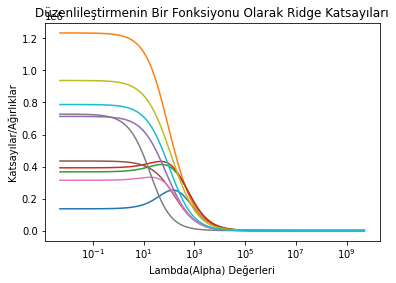

In [65]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")



RİDGE MODEL TAHMİN

In [66]:
y_pred1 = ridge_model.predict(X_train)

ridge_train_mse = np.sqrt(mean_squared_error(y_train, y_pred1))

ridge_train_mse

1096218.2515164257

In [67]:
r2_score(y_train, y_pred1)

0.610268721021435

In [68]:
y_pred2 = ridge_model.predict(X_test)

ridge_test_mse = np.sqrt(mean_squared_error(y_test, y_pred2))

ridge_test_mse

1436530.8809371856

In [69]:
r2_score(y_test, y_pred2)

0.5917316663325884

In [70]:
RMSE.loc[3,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, y_pred1)))

RMSE.loc[3,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, y_pred2)))

ELASTİCNET MODEL

In [71]:
house = pd.read_csv("../input/housing-prices-dataset/Housing.csv")
df = house.copy()
df = df.drop(["area","furnishingstatus"], axis=1)
dms = pd.get_dummies(df[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]])
y = df["price"]
X_ = df.drop(["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["mainroad_yes","guestroom_yes","basement_yes","hotwaterheating_yes","airconditioning_yes","prefarea_yes"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
enet_model = ElasticNet().fit(X_train, y_train)

In [74]:
enet_model.coef_

array([246674.22201603, 428139.53608025, 352992.28105683, 361607.13137237,
       206483.98967007, 187037.09360986, 195507.29915978,  49206.37660145,
       355736.79170541, 261211.24518356])

In [75]:
enet_model.intercept_

2104127.920944848

In [76]:
enet_model.predict(X_test)

array([5210202.87381526, 5582838.52888295, 3585092.17178405,
       4540495.46656231, 3831766.39380007, 3831766.39380007,
       4910717.44825022, 5503328.07090638, 3927252.4070962 ,
       3625282.40413   , 7333858.83078079, 3585092.17178405,
       3734344.97381939, 4173781.98434662, 4380265.97401669,
       5021590.85095719, 3938084.45284088, 4902102.59793468,
       4741873.10538905, 3585092.17178405, 5507691.27385954,
       4831258.82345869, 3585092.17178405, 5190121.44418247,
       5112095.08707696, 5792831.01802523, 3967636.56455369,
       4995442.60370679, 5720428.27365039, 3938084.45284088,
       5425353.54698591, 4546365.80622927, 5508664.37730925,
       4184758.6748569 , 4431432.89687293, 5330242.13401493,
       5290517.33037128, 4982676.98773812, 3981019.19583541,
       4859572.43295318, 4554980.65654481, 3940828.96348946,
       5582838.52888295, 4546365.80622927, 3585092.17178405,
       4302436.09486182, 5674619.56475622, 4793040.0282453 ,
       3585092.17178405,

In [77]:
y_pred1 = enet_model.predict(X_train)

enet_train_mse = np.sqrt(mean_squared_error(y_train, y_pred1))

enet_train_mse

1282373.13921501

In [78]:
r2_score(y_train, y_pred1)

0.46666506667522356

In [79]:
y_pred2 = enet_model.predict(X_test)

enet_test_mse = np.sqrt(mean_squared_error(y_test, y_pred2))

enet_test_mse

1710056.6235542477

In [80]:
r2_score(y_test, y_pred2)

0.4214555316808961

In [81]:
RMSE.loc[4,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, y_pred1)))

RMSE.loc[4,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, y_pred2)))

TEST HATALARI KARŞILAŞTIRMASI

In [82]:
RMSE

,Train-RMSE,Test-RMSE
0,1096218.0,1725268.0
1,1098608.0,1423763.0
2,1098608.0,1436525.0
3,1096218.0,1436531.0
4,1282373.0,1710057.0


In [83]:
RMSE.index = ["PCR", "PLS", "LASSO", "RİDGE", "ELASTICNET"]

In [84]:
RMSE

,Train-RMSE,Test-RMSE
PCR,1096218.0,1725268.0
PLS,1098608.0,1423763.0
LASSO,1098608.0,1436525.0
RİDGE,1096218.0,1436531.0
ELASTICNET,1282373.0,1710057.0


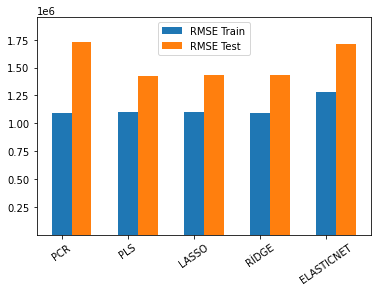

In [85]:
plt.bar(np.arange(5), RMSE["Train-RMSE"].values, width=0.3, label='RMSE Train')
plt.bar(np.arange(5)+0.3, RMSE["Test-RMSE"].values, width=0.3, label='RMSE Test')
plt.xticks(np.arange(5),RMSE.index, rotation =35)
plt.legend()
plt.ylim([0.75,1.95e6])
plt.show()

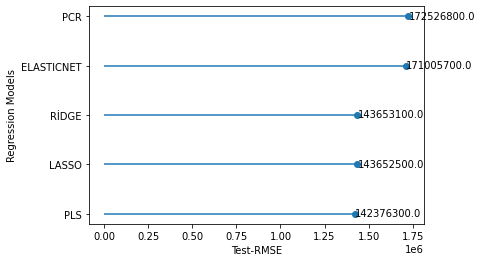

In [86]:
R2 = round(RMSE['Test-RMSE'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.xlabel('Test-RMSE')
plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='black')
plt.show()